Fold 1


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch 1: Train loss: 2.8177609708574085, Valid loss: 2.027674674987793, Valid acc: 0.30833333333333335


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 2: Train loss: 1.9577052262094286, Valid loss: 1.8185460567474365, Valid acc: 0.325


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


Epoch 3: Train loss: 1.7066857682334051, Valid loss: 1.5830929279327393, Valid acc: 0.39166666666666666


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


Epoch 4: Train loss: 1.4315632714165583, Valid loss: 1.2555789947509766, Valid acc: 0.5666666666666667


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


Epoch 5: Train loss: 1.2193890810012817, Valid loss: 1.0391696691513062, Valid acc: 0.7


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


Epoch 6: Train loss: 1.0289307336012523, Valid loss: 0.847698450088501, Valid acc: 0.7333333333333334


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


Epoch 7: Train loss: 0.8381486766868167, Valid loss: 0.6516295671463013, Valid acc: 0.8833333333333333


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]


Epoch 8: Train loss: 0.7061786121792264, Valid loss: 0.6346017122268677, Valid acc: 0.8666666666666667


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


Epoch 9: Train loss: 0.6019588030046887, Valid loss: 0.5335626006126404, Valid acc: 0.8583333333333334


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


Epoch 10: Train loss: 0.48992765777640873, Valid loss: 0.5646706223487854, Valid acc: 0.8333333333333333


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 11: Train loss: 0.4626147896051407, Valid loss: 0.4161902070045471, Valid acc: 0.9


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


Epoch 12: Train loss: 0.3707990248998006, Valid loss: 0.31545746326446533, Valid acc: 0.925


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


Epoch 13: Train loss: 0.311230578356319, Valid loss: 0.29315024614334106, Valid acc: 0.9333333333333333


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Epoch 14: Train loss: 0.2699739577041732, Valid loss: 0.296223521232605, Valid acc: 0.9333333333333333


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

Epoch 15: Train loss: 0.26183468186193043, Valid loss: 0.2808836102485657, Valid acc: 0.9333333333333333


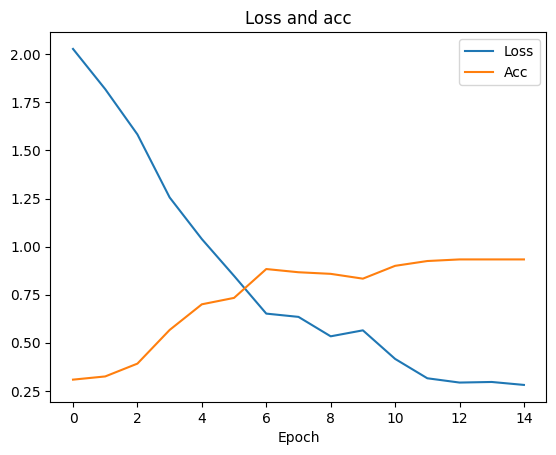

Average acc: 0.7394444444444446
Average valid loss: 0.8372086882591248
Fold 2


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


Epoch 1: Train loss: 3.1063879330952964, Valid loss: 2.2204201221466064, Valid acc: 0.19378531073446326


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


Epoch 2: Train loss: 2.1718555291493735, Valid loss: 2.1552376747131348, Valid acc: 0.28361581920903955


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


Epoch 3: Train loss: 2.029842793941498, Valid loss: 1.9827985763549805, Valid acc: 0.30254237288135594


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Epoch 4: Train loss: 1.8511537578370836, Valid loss: 1.8453714847564697, Valid acc: 0.41200564971751413


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


Epoch 5: Train loss: 1.6124695208337572, Valid loss: 1.607492446899414, Valid acc: 0.5466101694915254


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


Epoch 6: Train loss: 1.401996950308482, Valid loss: 1.4048802852630615, Valid acc: 0.5709039548022599


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


Epoch 7: Train loss: 1.1647078163093991, Valid loss: 1.2780531644821167, Valid acc: 0.6388418079096045


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


Epoch 8: Train loss: 1.022718032201131, Valid loss: 1.1106667518615723, Valid acc: 0.6550847457627118


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]


Epoch 9: Train loss: 0.8821422391467624, Valid loss: 1.0181925296783447, Valid acc: 0.6889830508474576


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


Epoch 10: Train loss: 0.7600672476821475, Valid loss: 0.9744359254837036, Valid acc: 0.6723163841807909


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


Epoch 11: Train loss: 0.6813765797350142, Valid loss: 0.8241854906082153, Valid acc: 0.7563559322033898


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch 12: Train loss: 0.5811020914051268, Valid loss: 0.8021057844161987, Valid acc: 0.806497175141243


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch 13: Train loss: 0.5256952395041784, Valid loss: 0.7693885564804077, Valid acc: 0.7648305084745763


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


Epoch 14: Train loss: 0.4777710719241036, Valid loss: 0.6998400688171387, Valid acc: 0.8319209039548023


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

Epoch 15: Train loss: 0.3914232436153624, Valid loss: 0.6559196710586548, Valid acc: 0.8069209039548022


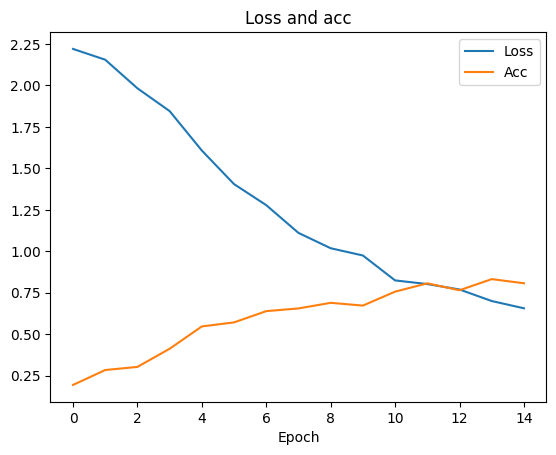

Average acc: 0.5954143126177024
Average valid loss: 1.2899324893951416
Fold 3


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


Epoch 1: Train loss: 2.506827804777357, Valid loss: 2.16766357421875, Valid acc: 0.21101694915254238


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


Epoch 2: Train loss: 2.036932362450494, Valid loss: 2.0405662059783936, Valid acc: 0.23531073446327683


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch 3: Train loss: 1.7811652421951294, Valid loss: 1.7185252904891968, Valid acc: 0.471045197740113


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch 4: Train loss: 1.51072492202123, Valid loss: 1.4280927181243896, Valid acc: 0.5716101694915254


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


Epoch 5: Train loss: 1.2553337613741558, Valid loss: 1.2997807264328003, Valid acc: 0.6132768361581921


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


Epoch 6: Train loss: 1.1281790998246934, Valid loss: 1.131551742553711, Valid acc: 0.6802259887005649


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch 7: Train loss: 0.9334221416049533, Valid loss: 0.9787986278533936, Valid acc: 0.7307909604519774


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]


Epoch 8: Train loss: 0.8344506190882789, Valid loss: 0.8342792987823486, Valid acc: 0.7641242937853108


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch 9: Train loss: 0.745982825756073, Valid loss: 0.797641396522522, Valid acc: 0.7812146892655367


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]


Epoch 10: Train loss: 0.6508629338608848, Valid loss: 0.7717298269271851, Valid acc: 0.7810734463276836


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


Epoch 11: Train loss: 0.5507931758960088, Valid loss: 0.6839325428009033, Valid acc: 0.8151129943502825


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Epoch 12: Train loss: 0.4923938016096751, Valid loss: 0.654466986656189, Valid acc: 0.8233050847457627


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


Epoch 13: Train loss: 0.47380167577001786, Valid loss: 0.6877708435058594, Valid acc: 0.8152542372881356


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch 14: Train loss: 0.39292673766613007, Valid loss: 0.6286218166351318, Valid acc: 0.8067796610169492


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

Epoch 15: Train loss: 0.34341925548182595, Valid loss: 0.5802625417709351, Valid acc: 0.8235875706214689


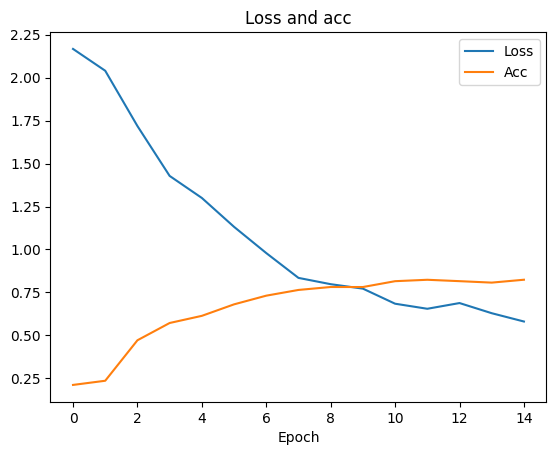

Average acc: 0.6615819209039546
Average valid loss: 1.0935789346694946
Fold 4


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]


Epoch 1: Train loss: 3.3970136510001288, Valid loss: 2.2795729637145996, Valid acc: 0.21101694915254238


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


Epoch 2: Train loss: 2.152495953771803, Valid loss: 2.0841269493103027, Valid acc: 0.25240112994350283


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


Epoch 3: Train loss: 2.0075005756484137, Valid loss: 1.9297337532043457, Valid acc: 0.2943502824858757


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch 4: Train loss: 1.786590748363071, Valid loss: 1.7066755294799805, Valid acc: 0.39604519774011304


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


Epoch 5: Train loss: 1.5500050981839497, Valid loss: 1.5044240951538086, Valid acc: 0.5792372881355932


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch 6: Train loss: 1.3542643388112385, Valid loss: 1.2219345569610596, Valid acc: 0.647316384180791


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch 7: Train loss: 1.1105504598882463, Valid loss: 1.0364431142807007, Valid acc: 0.7646892655367232


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Epoch 8: Train loss: 0.968528817097346, Valid loss: 0.9558722972869873, Valid acc: 0.7234463276836158


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch 9: Train loss: 0.8527580234739516, Valid loss: 0.8693596124649048, Valid acc: 0.7237288135593221


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]


Epoch 10: Train loss: 0.7190755407015482, Valid loss: 0.6755567789077759, Valid acc: 0.8731638418079096


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


Epoch 11: Train loss: 0.605306131972207, Valid loss: 0.6391487121582031, Valid acc: 0.8073446327683615


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch 12: Train loss: 0.5585131098826727, Valid loss: 0.6122316122055054, Valid acc: 0.7812146892655367


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


Epoch 13: Train loss: 0.4951477779282464, Valid loss: 0.5173783898353577, Valid acc: 0.865819209039548


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


Epoch 14: Train loss: 0.45836860769324833, Valid loss: 0.5087719559669495, Valid acc: 0.8231638418079097


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

Epoch 15: Train loss: 0.41011223528120255, Valid loss: 0.4481646716594696, Valid acc: 0.8742937853107344


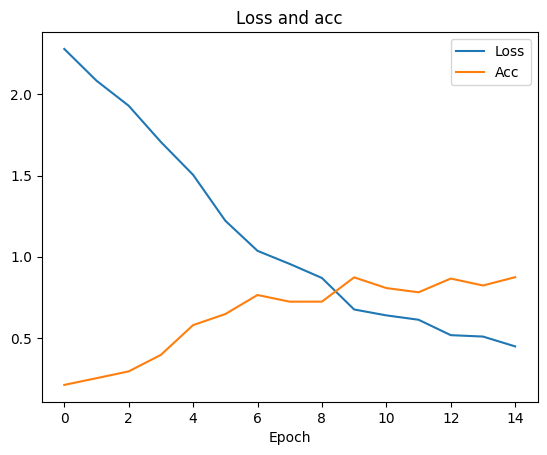

Average acc: 0.6411487758945387
Average valid loss: 1.1326261758804321
Fold 5


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


Epoch 1: Train loss: 3.3990286853578358, Valid loss: 2.3130626678466797, Valid acc: 0.09307909604519773


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]


Epoch 2: Train loss: 2.2528817786110773, Valid loss: 2.220170021057129, Valid acc: 0.21087570621468926


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch 3: Train loss: 2.1453112098905773, Valid loss: 2.1202101707458496, Valid acc: 0.2620056497175141


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Epoch 4: Train loss: 2.057472844918569, Valid loss: 2.0364158153533936, Valid acc: 0.2364406779661017


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch 5: Train loss: 1.948294957478841, Valid loss: 1.9296250343322754, Valid acc: 0.29505649717514126


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Epoch 6: Train loss: 1.826933549510108, Valid loss: 1.8077905178070068, Valid acc: 0.29491525423728815


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


Epoch 7: Train loss: 1.691376076804267, Valid loss: 1.6697663068771362, Valid acc: 0.336864406779661


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


Epoch 8: Train loss: 1.5297760168711345, Valid loss: 1.5489740371704102, Valid acc: 0.46228813559322035


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Epoch 9: Train loss: 1.4453317589230008, Valid loss: 1.3817803859710693, Valid acc: 0.5980225988700565


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


Epoch 10: Train loss: 1.310535642835829, Valid loss: 1.343179702758789, Valid acc: 0.5293785310734463


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


Epoch 11: Train loss: 1.2335254814889696, Valid loss: 1.2136142253875732, Valid acc: 0.6149717514124293


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]


Epoch 12: Train loss: 1.159290373325348, Valid loss: 1.1824743747711182, Valid acc: 0.6040960451977402


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch 13: Train loss: 1.1214397450288136, Valid loss: 1.0548152923583984, Valid acc: 0.7146892655367232


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


Epoch 14: Train loss: 1.067031247748269, Valid loss: 0.993242621421814, Valid acc: 0.6894067796610169


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

Epoch 15: Train loss: 0.9834816389613681, Valid loss: 0.9580532312393188, Valid acc: 0.6802259887005649


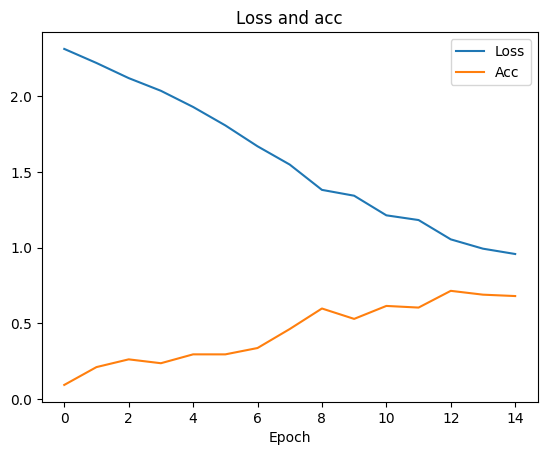

Average acc: 0.44148775894538606
Average valid loss: 1.5848782062530518
Fold 6


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


Epoch 1: Train loss: 2.9827976756625705, Valid loss: 2.163031578063965, Valid acc: 0.2268361581920904


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch 2: Train loss: 2.04357291592492, Valid loss: 1.9369158744812012, Valid acc: 0.344774011299435


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


Epoch 3: Train loss: 1.799825198120541, Valid loss: 1.7811923027038574, Valid acc: 0.41144067796610173


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]


Epoch 4: Train loss: 1.549846112728119, Valid loss: 1.5079514980316162, Valid acc: 0.49618644067796613


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]


Epoch 5: Train loss: 1.347498595714569, Valid loss: 1.341500163078308, Valid acc: 0.5378531073446328


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch 6: Train loss: 1.1616439421971638, Valid loss: 1.249685525894165, Valid acc: 0.6468926553672316


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch 7: Train loss: 1.0131912761264377, Valid loss: 1.027649998664856, Valid acc: 0.6974576271186441


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


Epoch 8: Train loss: 0.8560477991898855, Valid loss: 0.9123324155807495, Valid acc: 0.7137005649717514


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


Epoch 9: Train loss: 0.7304205331537459, Valid loss: 0.8863317966461182, Valid acc: 0.6887005649717514


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


Epoch 10: Train loss: 0.6377902328968048, Valid loss: 0.7429119348526001, Valid acc: 0.764406779661017


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch 11: Train loss: 0.5428756475448608, Valid loss: 0.6217184066772461, Valid acc: 0.806638418079096


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Epoch 12: Train loss: 0.4815078228712082, Valid loss: 0.709015965461731, Valid acc: 0.7398305084745762


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


Epoch 13: Train loss: 0.40776290992895764, Valid loss: 0.5962726473808289, Valid acc: 0.8238700564971752


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


Epoch 14: Train loss: 0.35827742682562935, Valid loss: 0.5317490100860596, Valid acc: 0.8323446327683616


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

Epoch 15: Train loss: 0.2955019548535347, Valid loss: 0.4420624077320099, Valid acc: 0.8574858757062147


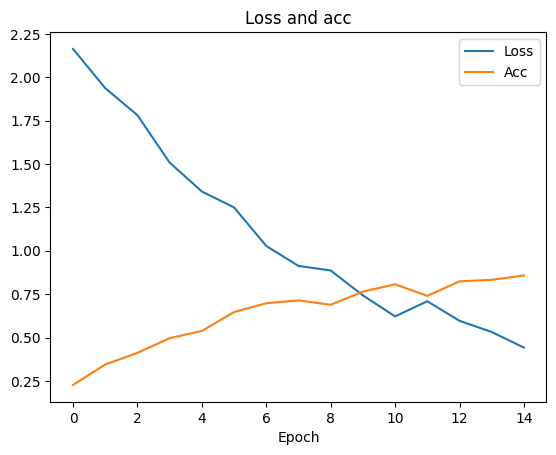

Average acc: 0.6392278719397363
Average valid loss: 1.0966880321502686
Fold 7


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]


Epoch 1: Train loss: 2.9644003444247775, Valid loss: 2.267747402191162, Valid acc: 0.17627118644067796


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


Epoch 2: Train loss: 2.2188471820619373, Valid loss: 2.227750539779663, Valid acc: 0.13559322033898305


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


Epoch 3: Train loss: 2.1176051100095115, Valid loss: 2.104227066040039, Valid acc: 0.24463276836158193


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]


Epoch 4: Train loss: 1.98815565639072, Valid loss: 1.9147660732269287, Valid acc: 0.36963276836158193


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch 5: Train loss: 1.7806401517656114, Valid loss: 1.669966697692871, Valid acc: 0.5209039548022598


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]


Epoch 6: Train loss: 1.5925233430332608, Valid loss: 1.521715760231018, Valid acc: 0.47937853107344636


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


Epoch 7: Train loss: 1.3997260795699225, Valid loss: 1.2283143997192383, Valid acc: 0.6802259887005649


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch 8: Train loss: 1.1700376868247986, Valid loss: 1.0571460723876953, Valid acc: 0.7562146892655368


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 9: Train loss: 1.043469614452786, Valid loss: 0.9800136685371399, Valid acc: 0.6967514124293785


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


Epoch 10: Train loss: 0.9272774027453529, Valid loss: 0.8172366619110107, Valid acc: 0.7727401129943503


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


Epoch 11: Train loss: 0.8436288833618164, Valid loss: 0.7863554954528809, Valid acc: 0.8067796610169492


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]


Epoch 12: Train loss: 0.7916887998580933, Valid loss: 0.7311881184577942, Valid acc: 0.7642655367231639


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch 13: Train loss: 0.7030784123473697, Valid loss: 0.6153850555419922, Valid acc: 0.8909604519774011


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 14: Train loss: 0.6150839394993253, Valid loss: 0.561383843421936, Valid acc: 0.8573446327683616


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

Epoch 15: Train loss: 0.5944777346319623, Valid loss: 0.6016796231269836, Valid acc: 0.8153954802259886


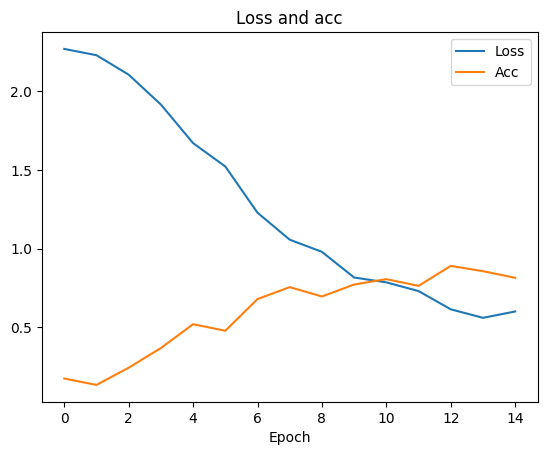

Average acc: 0.5978060263653483
Average valid loss: 1.2723251581192017
Fold 8


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch 1: Train loss: 2.90268341700236, Valid loss: 2.084477186203003, Valid acc: 0.2694915254237288


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]


Epoch 2: Train loss: 1.951759358247121, Valid loss: 1.7552411556243896, Valid acc: 0.3954802259887006


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


Epoch 3: Train loss: 1.6499321262041728, Valid loss: 1.5661697387695312, Valid acc: 0.4296610169491525


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]


Epoch 4: Train loss: 1.4264243178897433, Valid loss: 1.2676618099212646, Valid acc: 0.6477401129943503


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch 5: Train loss: 1.2320947647094727, Valid loss: 1.1268470287322998, Valid acc: 0.6562146892655367


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


Epoch 6: Train loss: 1.0358183317714267, Valid loss: 1.050258994102478, Valid acc: 0.6296610169491526


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


Epoch 7: Train loss: 0.8846204910013411, Valid loss: 0.8309702277183533, Valid acc: 0.8152542372881356


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


Epoch 8: Train loss: 0.7743114564153883, Valid loss: 0.7375762462615967, Valid acc: 0.78954802259887


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


Epoch 9: Train loss: 0.6423509783214993, Valid loss: 0.6458550691604614, Valid acc: 0.8401129943502825


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]


Epoch 10: Train loss: 0.571233719587326, Valid loss: 0.5989147424697876, Valid acc: 0.8659604519774011


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


Epoch 11: Train loss: 0.48017730481094784, Valid loss: 0.6236299872398376, Valid acc: 0.8403954802259888


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch 12: Train loss: 0.43742741809950936, Valid loss: 0.4457743167877197, Valid acc: 0.9077683615819209


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


Epoch 13: Train loss: 0.3985027049978574, Valid loss: 0.5318782329559326, Valid acc: 0.8240112994350283


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


Epoch 14: Train loss: 0.3404831729001469, Valid loss: 0.41042131185531616, Valid acc: 0.9161016949152543


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

Epoch 15: Train loss: 0.26318346460660297, Valid loss: 0.3841477632522583, Valid acc: 0.9077683615819209


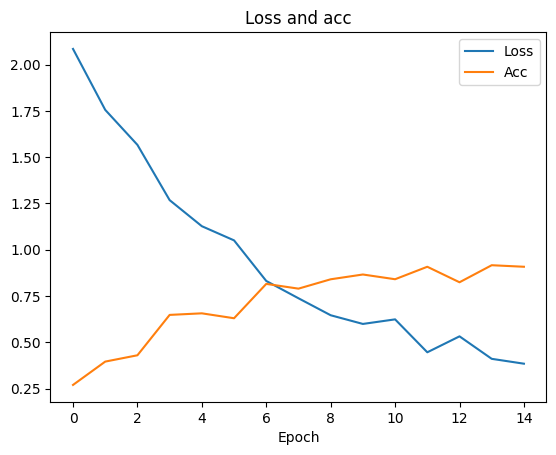

Average acc: 0.7156779661016949
Average valid loss: 0.9373215436935425
Fold 9


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Epoch 1: Train loss: 2.936143411530389, Valid loss: 2.302516460418701, Valid acc: 0.08361581920903954


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch 2: Train loss: 2.200311952167087, Valid loss: 2.150092840194702, Valid acc: 0.260593220338983


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


Epoch 3: Train loss: 2.05124608013365, Valid loss: 1.9221515655517578, Valid acc: 0.346045197740113


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


Epoch 4: Train loss: 1.8898852401309543, Valid loss: 1.732276439666748, Valid acc: 0.4296610169491525


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]


Epoch 5: Train loss: 1.6962669094403584, Valid loss: 1.5005335807800293, Valid acc: 0.5961864406779661


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]


Epoch 6: Train loss: 1.5094331701596577, Valid loss: 1.30704665184021, Valid acc: 0.5973163841807909


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


Epoch 7: Train loss: 1.3254133926497564, Valid loss: 1.280647873878479, Valid acc: 0.5471751412429379


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


Epoch 8: Train loss: 1.1662530567910936, Valid loss: 1.0076146125793457, Valid acc: 0.6475988700564972


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch 9: Train loss: 1.0101455450057983, Valid loss: 0.878496527671814, Valid acc: 0.7152542372881356


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch 10: Train loss: 0.8710592786471049, Valid loss: 0.8100627660751343, Valid acc: 0.7483050847457626


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


Epoch 11: Train loss: 0.7569325963656107, Valid loss: 0.7209933996200562, Valid acc: 0.7902542372881356


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 12: Train loss: 0.6978127658367157, Valid loss: 0.6812915802001953, Valid acc: 0.7990112994350282


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


Epoch 13: Train loss: 0.6076041029559242, Valid loss: 0.6010409593582153, Valid acc: 0.8322033898305086


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]


Epoch 14: Train loss: 0.58456266257498, Valid loss: 0.574052095413208, Valid acc: 0.8235875706214689


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

Epoch 15: Train loss: 0.49375129242738086, Valid loss: 0.529090166091919, Valid acc: 0.8656779661016949


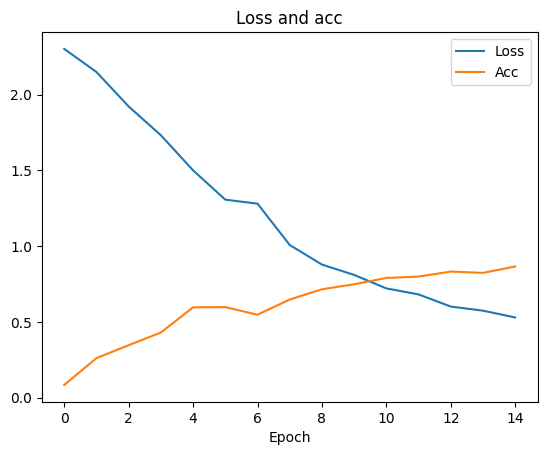

Average acc: 0.6054990583804142
Average valid loss: 1.1998604536056519
Fold 10


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch 1: Train loss: 3.3630892170800104, Valid loss: 2.2917375564575195, Valid acc: 0.08333333333333333


Validating: 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]


Epoch 2: Train loss: 2.275455845726861, Valid loss: 2.2924294471740723, Valid acc: 0.11807909604519773


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


Epoch 3: Train loss: 2.249387012587653, Valid loss: 2.259428024291992, Valid acc: 0.11751412429378531


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch 4: Train loss: 2.2128346496158176, Valid loss: 2.213268995285034, Valid acc: 0.15988700564971753


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Epoch 5: Train loss: 2.1732981536123486, Valid loss: 2.1874470710754395, Valid acc: 0.14392655367231638


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch 6: Train loss: 2.1411758528815374, Valid loss: 2.141035795211792, Valid acc: 0.1521186440677966


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


Epoch 7: Train loss: 2.082698490884569, Valid loss: 2.1304373741149902, Valid acc: 0.20240112994350284


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch 8: Train loss: 2.009850627846188, Valid loss: 2.014842987060547, Valid acc: 0.23587570621468928


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


Epoch 9: Train loss: 1.925251477294498, Valid loss: 1.88205087184906, Valid acc: 0.26101694915254237


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


Epoch 10: Train loss: 1.763637191719479, Valid loss: 1.7862098217010498, Valid acc: 0.3790960451977401


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]


Epoch 11: Train loss: 1.6669407619370356, Valid loss: 1.6531046628952026, Valid acc: 0.36200564971751414


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch 12: Train loss: 1.583393156528473, Valid loss: 1.546157717704773, Valid acc: 0.4535310734463277


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]


Epoch 13: Train loss: 1.4375167886416118, Valid loss: 1.4418573379516602, Valid acc: 0.48700564971751414


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


Epoch 14: Train loss: 1.3291847705841064, Valid loss: 1.374017596244812, Valid acc: 0.4864406779661017


Validating: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

Epoch 15: Train loss: 1.2359916302892897, Valid loss: 1.2593185901641846, Valid acc: 0.5538135593220339


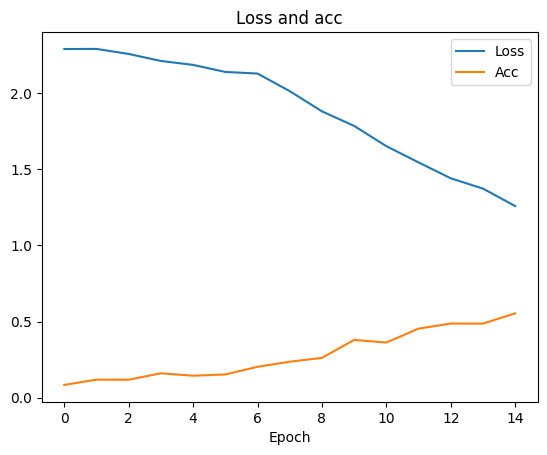

Average acc: 0.27973634651600754
Average valid loss: 1.8982230424880981
Total Average acc: 0.27973634651600754
Total Average valid loss: 1.8982230424880981


In [3]:
import os
import argparse
import random
from typing import Optional, Union
from tqdm import tqdm

import torchaudio
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

from hmmlearn import hmm


class ASRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(2, 2), padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Dropout(0.2),
            nn.Flatten(),
            nn.Linear(32 * 20 * 50, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        y = self.net(x)
        
        return y


class ASRDataset(Dataset):
    def __init__(self, apply_augmentation: bool = False):
        super().__init__()
        self.apply_augmentation = apply_augmentation
        self.target_num_frames = 100
        self.data = self.initialize_data()
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        audio_file_path = self.data[index][0]
        waveform, sample_rate = torchaudio.load(audio_file_path)
        
        if self.apply_augmentation:
            time_mask = torchaudio.transforms.TimeMasking(time_mask_param=5)
            freq_mask = torchaudio.transforms.FrequencyMasking(freq_mask_param=2)
        
        mfcc_transform = torchaudio.transforms.MFCC(
            melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 64}
        )
        
        if sample_rate != 16000:
            resampler = torchaudio.transforms.Resample(sample_rate, 16000)
            waveform = resampler(waveform)

        mfcc = mfcc_transform(waveform)
        mfcc = mfcc[0]
        mfcc = (mfcc - mfcc.mean()) / (mfcc.std() + 1e-6)
        
        if self.apply_augmentation:
            if random.random() < 0.5:
                mfcc = time_mask(mfcc)
            if random.random() < 0.5:
                mfcc = freq_mask(mfcc)
        
        # Pad/truncate along the time dimension
        time_frames = mfcc.shape[1]

        if time_frames > self.target_num_frames:
            # Truncate
            mfcc = mfcc[:, :self.target_num_frames]
        else:
            # Pad
            pad_amount = self.target_num_frames - time_frames
            # F.pad expects (batch, channels, ...)
            mfcc = mfcc.unsqueeze(0)  # now shape: [1, n_mfcc, time_frames]
            mfcc = torch.nn.functional.pad(mfcc, (0, pad_amount))  # pad on the time dimension
            mfcc = mfcc.squeeze(0)  # back to [n_mfcc, target_num_frames]
        
        label = nn.functional.one_hot(torch.tensor(self.data[index][1]), num_classes=10).to(torch.float32)
        
        return mfcc, label

    def initialize_data(self):
        data = []
        for root, _, files in os.walk("./語音資料0_9"):
            for file in files:
                if file.endswith(".wav"):
                    label = int(file[0])
                    data.append([os.path.join(root, file), label])
        
        return data

class Trainer:
    def __init__(
        self,
        device: Union[str, torch.device],
        model: nn.Module,
        optimizer: optim.Optimizer,
        loss_fn: nn.Module,
        train_data: Optional[DataLoader] = None,
        valid_data: Optional[DataLoader] = None,
        test_data: Optional[DataLoader] = None,
    ):
        self.device = device
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.train_data = train_data
        self.valid_data = valid_data
        self.test_data = test_data
    
    def set_train_data(self, train_data):
        self.train_data = train_data
    
    def set_valid_data(self, valid_data):
        self.valid_data = valid_data
    
    def set_test_data(self, test_data):
        self.test_data = test_data
    
    def train(self):
        self.model.train()
        
        total_train_loss = 0.0
        pbar = tqdm(desc="Training", total=len(self.train_data), dynamic_ncols=True)
        for batch in self.train_data:
            batch = self.batch_to_device(batch)
            input_ids = batch[0]
            input_ids = input_ids.unsqueeze(1)
            label = batch[1]
            
            hypo = self.model(input_ids)
            hypo = F.log_softmax(hypo, dim=1)
            label = label.argmax(dim=1)
            loss = self.loss_fn(hypo, label)
            
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            total_train_loss += loss.item()
            
            pbar.update(1)
        pbar.close()
        
        valid_loss, valid_acc = self.valid()
        
        return total_train_loss / len(self.train_data), valid_loss, valid_acc

    def batch_to_device(self, batch):
        return [b.to(self.device) for b in batch]
    
    @torch.no_grad()
    def valid(self):
        self.model.eval()
        
        acc = 0.0
        loss = 0.0
        pbar = tqdm(desc="Validating", total=len(self.valid_data), dynamic_ncols=True)
        for batch in self.valid_data:
            batch = self.batch_to_device(batch)
            input_ids = batch[0]
            input_ids = input_ids.unsqueeze(1)
            label = batch[1]
            
            hypo = self.model(input_ids)
            hypo = F.log_softmax(hypo, dim=1)
            label = label.argmax(dim=1)
            loss += self.loss_fn(hypo, label)
            
            acc += (hypo.argmax(dim=1) == label).sum().item() / len(label)
            pbar.update(1)
        pbar.close()
        
        return loss / len(self.valid_data), acc / len(self.valid_data)

def main(args):
    kf = KFold(n_splits=args.kfold, shuffle=True)
    dataset = ASRDataset(apply_augmentation=False)
    
    if args.model == "nn":
        train_nn(kf, dataset)
    elif args.model == "hmm":
        train_hmm(kf, dataset)
    else:
        raise ValueError("Invalid model type")

def train_nn(kf: KFold, dataset: ASRDataset):
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    loss_fn = nn.NLLLoss()
    for index, (train_idx, valid_idx) in enumerate(kf.split(dataset)):
        acc_per_fold = []
        acc_per_fold_total = []
        valid_loss_per_fold = []
        valid_loss_per_fold_total = []
        print(f"Fold {index + 1}")
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        valid_subset = torch.utils.data.Subset(dataset, valid_idx)
        
        train_data = DataLoader(train_subset, batch_size=60, shuffle=True)
        valid_data = DataLoader(valid_subset, batch_size=60, shuffle=False)
        
        model = ASRNet().to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        trainer = Trainer(device, model, optimizer, loss_fn, train_data=train_data, valid_data=valid_data)
        
        for epoch in range(15):
            train_loss, valid_loss, valid_acc = trainer.train()
            print(f"Epoch {epoch + 1}: Train loss: {train_loss}, Valid loss: {valid_loss}, Valid acc: {valid_acc}")
            valid_loss_per_fold.append(valid_loss)
            valid_loss_per_fold_total.append(valid_loss)
            acc_per_fold.append(valid_acc)
            acc_per_fold_total.append(valid_acc)
            if valid_acc >= max(acc_per_fold):
                torch.save(model.state_dict(), "best_model.pth")
            

    
        plt.title("Loss and acc")
        plt.plot(valid_loss_per_fold)
        plt.plot(acc_per_fold)
        plt.legend(["Loss", "Acc"])
        plt.xlabel("Epoch")
        # plt.savefig(f"nn_loss_acc{index+1}.png")
        plt.show()
        # plt.close()
        print(f"Average acc: {np.mean(acc_per_fold)}")
        print(f"Average valid loss: {np.mean(valid_loss_per_fold)}")
    print(f"Total Average acc: {np.mean(acc_per_fold_total)}")
    print(f"Total Average valid loss: {np.mean(valid_loss_per_fold_total)}")

def fit_kmeans(class_to_mfcc: dict[int, list[np.ndarray]]):
    kmeans = KMeans(n_clusters=64, random_state=42)
    
    # Process data for kmeans
    all_mfcc = []
    for label, seq in class_to_mfcc.items():
        for arr in seq:
            all_mfcc.append(arr)
    
    flattened_mfcc = np.concatenate(all_mfcc, axis=0)
    kmeans = kmeans.fit(flattened_mfcc)
    
    return kmeans

def fit_dhmm(class_to_discrete: dict[int, list[np.ndarray]]):
    # Train DHMM
    label_to_hmm = {i: None for i in range(10)}
    for i in range(10):
        seq_list = class_to_discrete[i]
        x = np.concatenate(seq_list, axis=0)
        lengths = [len(s) for s in seq_list]
        hmm_model = hmm.CategoricalHMM(n_components=6, n_iter=100, random_state=42)
        hmm_model.fit(x, lengths)
        label_to_hmm[i] = hmm_model
    
    return label_to_hmm

def train_hmm(kf: KFold, dataset: ASRDataset):
    acc_per_fold = []
    for index, (train_idx, valid_idx) in enumerate(kf.split(dataset)):
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        valid_subset = torch.utils.data.Subset(dataset, valid_idx)
        
        train_data = DataLoader(train_subset, batch_size=1)
        valid_data = DataLoader(valid_subset, batch_size=1)
        
        # Process data, pair label with mfcc using dictionary
        class_to_mfcc = {i: [] for i in range(10)}
        for batch in train_data:
            fearture, label = batch
            scalar_label = label.squeeze(0).argmax().item()
            fearture = fearture.squeeze(0).numpy().T
            class_to_mfcc[scalar_label].append(fearture)
        
        kmeans = fit_kmeans(class_to_mfcc)
        
        # Convert each mfcc to discrete for DHMM
        class_to_discrete = {i: [] for i in range(10)}
        for label, seq in class_to_mfcc.items():
            for arr in seq:
                discrete = kmeans.predict(arr).reshape(-1, 1)
                class_to_discrete[label].append(discrete)
        
        label_to_hmm = fit_dhmm(class_to_discrete)
        acc = 0.0
        for batch in tqdm(valid_data):
            mfcc, label = batch
            mfcc = mfcc.squeeze(0).numpy().T
            label = label.squeeze(0).argmax().item()
            predict_label = classify(kmeans, mfcc, label_to_hmm)
            acc += 1 if predict_label == label else 0
        
        acc_per_fold.append(acc / len(valid_data))
        print(f"Acc: {acc / len(valid_data)}")
    
    print(np.mean(acc_per_fold))

def classify(
    kmeans,
    mfcc,
    hmm_models: dict[int, hmm.CategoricalHMM]
):
    discretes = kmeans.predict(mfcc).reshape(-1, 1)
    
    best_score = float("-inf")
    best_label = None
    for label, model in hmm_models.items():
        score = model.score(discretes)
        if score > best_score:
            best_score = score
            best_label = label
    
    return best_label

class Args:
    model = "nn"
    kfold = 10

if __name__ == "__main__":
    args = Args()
    main(args)
    

1/1 [==============================] - 0s 31ms/step


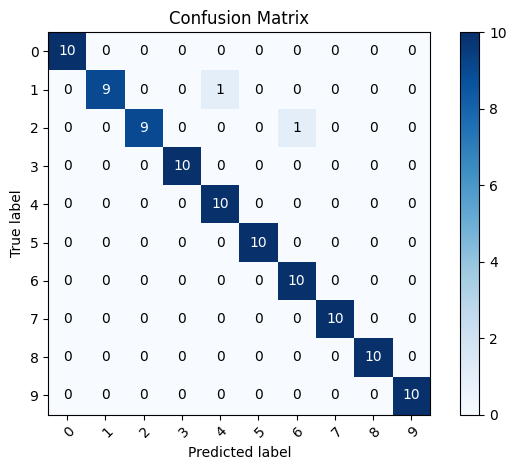

辨識正確率為: 98.0% (98/100)


In [2]:
from keras.models import load_model
import numpy as np
import librosa
import os
from plot_confusion_matrix import plot_confusion_matrix
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from preprocess_for_cnn import *
path = 'test_audio_cnn/'
def predict(model):
    pred = []
    true = []
    ii = []
    jj = []
    labels = os.listdir(path)
    for i in labels:
        for j in os.listdir(path + i):
            ii.append(i)
            jj.append(j)
            true.append(int(i[i.find('(')+1]))
            
            mfcc = wav2mfcc(path + i + '/' + j)
            mfcc_reshaped = mfcc.reshape(1, 20, 11, 1)
            tmp = model.predict(mfcc_reshaped)
            pred.append(np.argmax(tmp))
    #print(ii)
    #print()
    #print(jj)
    #print(true)
    #print()
    #print(pred)
    plot_confusion_matrix(true, pred, classes = labels,
                          title='Confusion Matrix')
    right = sum([1 for i, j in zip(true, pred) if i == j])
    acc_rate = right / len(true) * 100
    plt.savefig("Acc_"+str(acc_rate)+"_.png")
    plt.show()
    #right = sum([1 for i, j in zip(true, pred) if i == j])
    #acc_rate = right / len(true) * 100
    print('辨識正確率為: {acc}% ({t}/{p})'.format(acc=acc_rate, t=right, p=len(true)))
    

'''=======================以上完全不用改動==================='''

if __name__ == '__main__':
    '''如果要使用完整訓練的模型，請把下面兩行註解拿掉
       不用的時候請註解回去 使用自己訓練的模型
    '''
    model = load_model("ASR.h5")
    l = ["zero(0)","one(1)","two(2)","three(3)","four(4)","five(5)","six(6)","seven(7)","eigth(8)","nine(9)"]
    filepath = []
    for i in range(len(l)):
        path_ = path+l[i]+"/1_"+str(i)+".wav"
        filepath.append(path_)
    
    for i in filepath:
        #print(i)
        pass
        #print(predict(i, model=model))
 

    
    predict(model)